In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify
from scipy.stats import norm

In [2]:
df = pd.read_csv("cleaned.csv")
df['approx_cost'] = df['approx_cost'].astype("float32")
df['rating'] = df['rating'].astype("float32")
df['rating_count'] = df['rating_count'].astype("int32")
df.head(2)

,url,address,name,online_order,book_table,rating,rating_count,phone,location,rest_type,specialty,cuisines,approx_cost,reviews,menu,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"['080 42297555', '+91 9743772233']",Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",400.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",No Menu,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,['080 41714161'],Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",400.0,"[('Rated 4.0', 'RATED\n Had been here for din...",No Menu,Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rating        51717 non-null  float32
 6   rating_count  51717 non-null  int32  
 7   phone         51717 non-null  object 
 8   location      51717 non-null  object 
 9   rest_type     51717 non-null  object 
 10  specialty     51717 non-null  object 
 11  cuisines      51717 non-null  object 
 12  approx_cost   51717 non-null  float32
 13  reviews       51717 non-null  object 
 14  menu          51717 non-null  object 
 15  type          51717 non-null  object 
 16  city          51717 non-null  object 
dtypes: float32(2), int32(1), object(14)
memory usage: 6.1+ MB


# Data Visualization

## Restaurants delivering Online or not

In [4]:
def Pie_NumData(x):
    return f'{x:.1f}%\n{int(df.shape[0]*x/100)} Rest.'

In [5]:
def text_edit(bar,upper, lower, total):
    plt.text(bar,(upper+lower)/2,f'{round((upper-lower)/total*100,1)}%',ha='center')

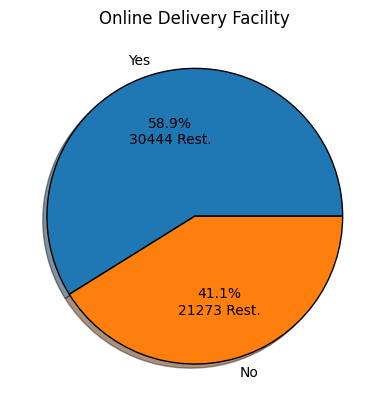

In [6]:
plt.pie(df["online_order"].value_counts(),
        labels=df["online_order"].unique(),
        autopct=lambda pct: Pie_NumData(pct),
        shadow=True,
        wedgeprops={
            "edgecolor":"black",
            "linewidth":1,
            "antialiased": True
        })
plt.title("Online Delivery Facility")
plt.show()

In [7]:
No = df[['online_order','rating']][df['online_order']=='No'].copy()
Yes = df[['online_order','rating']][df['online_order']=='Yes'].copy()

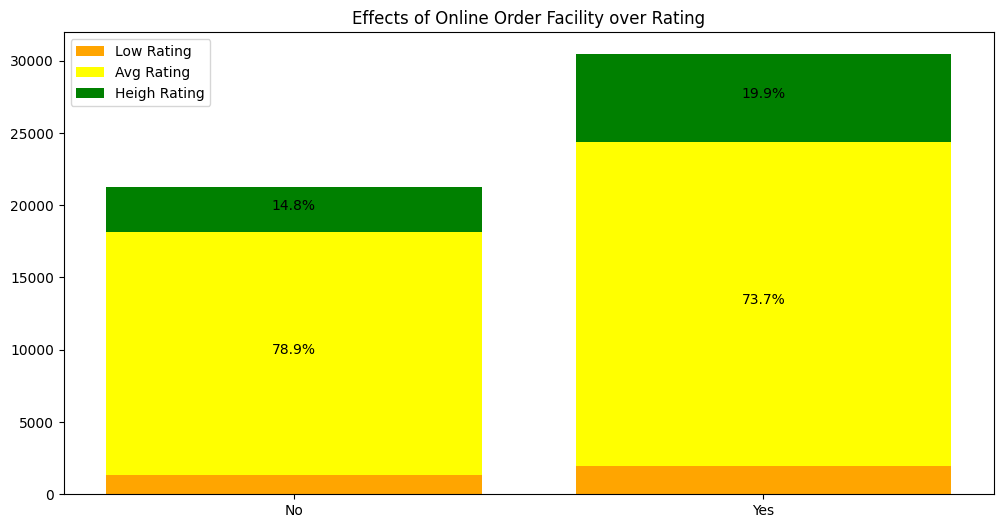

In [8]:
plt.figure(figsize=(12,6))
plt.bar(No['online_order'],
        No['rating'][No['rating']<=3].count(),
        color='orange', label='Low Rating')

plt.bar(No['online_order'],
        No['rating'][(No['rating']<=4) & (No['rating']>3)].count(),
        bottom=No['rating'][No['rating']<=3].count(),color='yellow',label='Avg Rating')
text_edit(0,
          No['rating'][(No['rating']<=4)].count(),
          No['rating'][No['rating']<=3].count(),
          No.rating.count())

plt.bar(No['online_order'],
        No['rating'][No['rating']>4].count(),
        bottom=(No['rating'][No['rating']<=4].count()),
        color='green',
        label='Heigh Rating')
text_edit(0,
          No['rating'].count(),
          No['rating'][(No['rating']<=4)].count(),
          No.rating.count())



plt.bar(Yes['online_order'],
        Yes['rating'][Yes['rating']<=3].count(),
        color='orange')

plt.bar(Yes['online_order'],
        Yes['rating'][(Yes['rating']<=4) & (Yes['rating']>3)].count(),
        bottom=Yes['rating'][Yes['rating']<=3].count(),color='yellow')
text_edit(1,
          Yes['rating'][(Yes['rating']<=4)].count(),
          Yes['rating'][Yes['rating']<=3].count(),
          Yes.rating.count())

plt.bar(Yes['online_order'],
        Yes['rating'][Yes['rating']>4].count(),
        bottom=(Yes['rating'][Yes['rating']<=4].count()),
        color='green')
text_edit(1, Yes['rating'].count(), Yes['rating'][Yes['rating']<=4].count(), Yes.rating.count())


plt.title("Effects of Online Order Facility over Rating")
plt.legend(loc='upper left')
plt.show()
del Yes, No

## Restaurants allowing table booking or not

In [9]:
df['book_table'].unique()[::-1]

array(['No', 'Yes'], dtype=object)

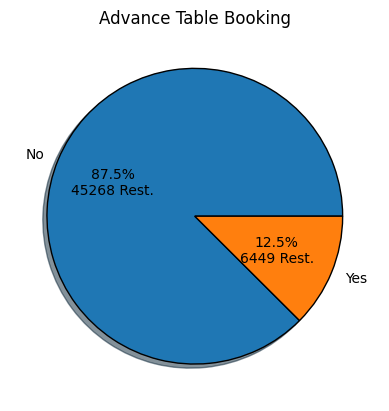

In [10]:
plt.pie(df['book_table'].value_counts(),
       autopct= lambda pct: Pie_NumData(pct),
       labels=df['book_table'].unique()[::-1],
       shadow=True,
       wedgeprops={
           'edgecolor':"black",
           'linewidth':1,
           'antialiased':True
       })
plt.title("Advance Table Booking")
plt.show()

In [11]:
No = df[['book_table','rating']][df['book_table']=='No'].copy()
Yes = df[['book_table','rating']][df['book_table']=='Yes'].copy()

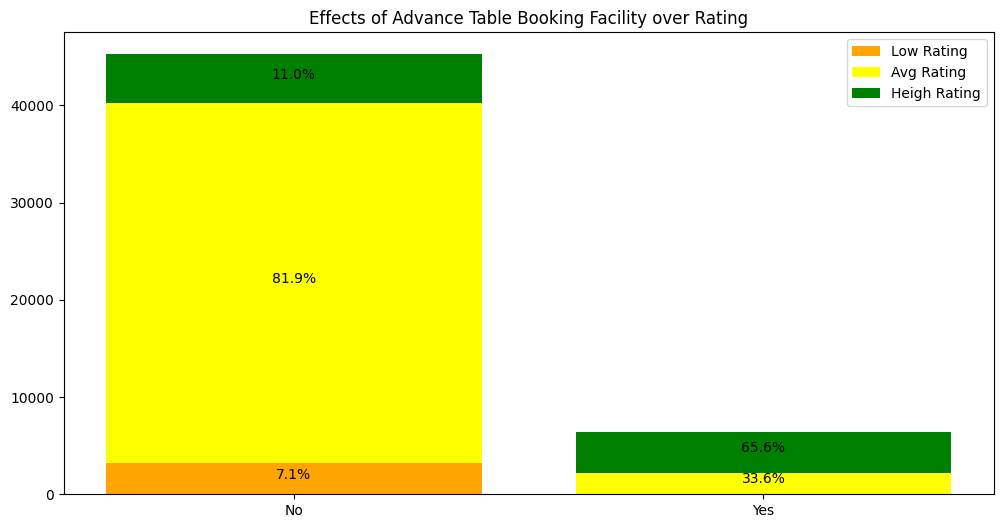

In [12]:
plt.figure(figsize=(12,6))
plt.bar(No['book_table'],
        No['rating'][No['rating']<=3].count(),
        color='orange', label='Low Rating')
text_edit(0, No['rating'][No['rating']<=3].count(),
          0, No.rating.count())

plt.bar(No['book_table'],
        No['rating'][(No['rating']<=4) & (No['rating']>3)].count(),
        bottom=No['rating'][No['rating']<=3].count(),color='yellow',label='Avg Rating')
text_edit(0,
          No['rating'][(No['rating']<=4)].count(),
          No['rating'][No['rating']<=3].count(),
          No.rating.count())

plt.bar(No['book_table'],
        No['rating'][No['rating']>4].count(),
        bottom=(No['rating'][No['rating']<=4].count()),
        color='green',
        label='Heigh Rating')
text_edit(0,
          No['rating'].count(),
          No['rating'][(No['rating']<=4)].count(),
          No.rating.count())



plt.bar(Yes['book_table'],
        Yes['rating'][Yes['rating']<=3].count(),
        color='orange')

plt.bar(Yes['book_table'],
        Yes['rating'][(Yes['rating']<=4) & (Yes['rating']>3)].count(),
        bottom=Yes['rating'][Yes['rating']<=3].count(),color='yellow')
text_edit(1,
          Yes['rating'][(Yes['rating']<=4)].count(),
          Yes['rating'][Yes['rating']<=3].count(),
          Yes.rating.count())

plt.bar(Yes['book_table'],
        Yes['rating'][Yes['rating']>4].count(),
        bottom=(Yes['rating'][Yes['rating']<=4].count()),
        color='green')
text_edit(1, Yes['rating'].count(), Yes['rating'][Yes['rating']<=4].count(), Yes.rating.count())


plt.title("Effects of Advance Table Booking Facility over Rating")
plt.legend(loc='upper right')
plt.show()
del Yes, No

## Best Location

In [13]:
locations = df[['location','rating']].groupby('location')
Avg_rating = locations.mean()
Avg_rating = Avg_rating.sort_values('rating', ascending=False)

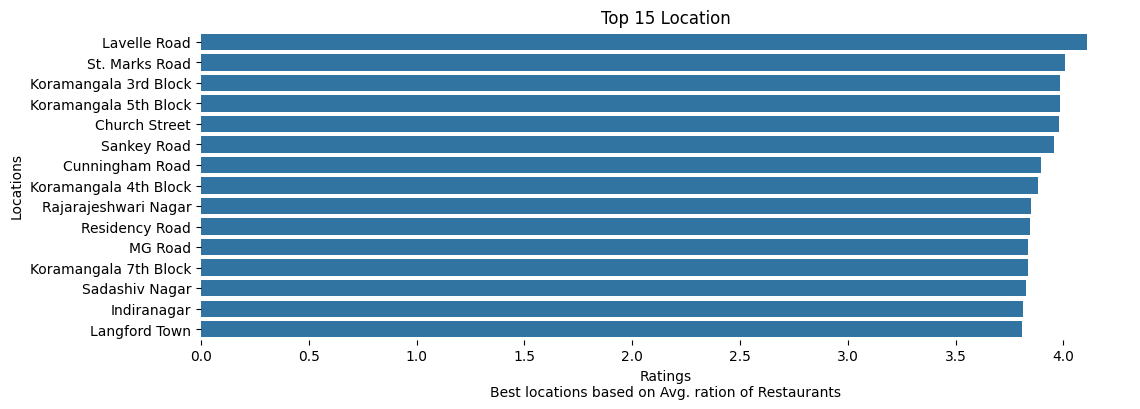

In [14]:
plt.figure(figsize=(12,4))

sns.barplot(x='rating',y=Avg_rating.index[:15],data=Avg_rating[:15])
sns.despine(left=True,bottom=True)

plt.xlabel("Ratings\nBest locations based on Avg. ration of Restaurants")
plt.ylabel("Locations")
plt.title("Top 15 Location")
plt.show()

## Relation between Location and Rating
* by comparing best laction to last restaurant in the list

In [15]:
top_res = Avg_rating.index[0]
bottom_res = Avg_rating.index[-1]

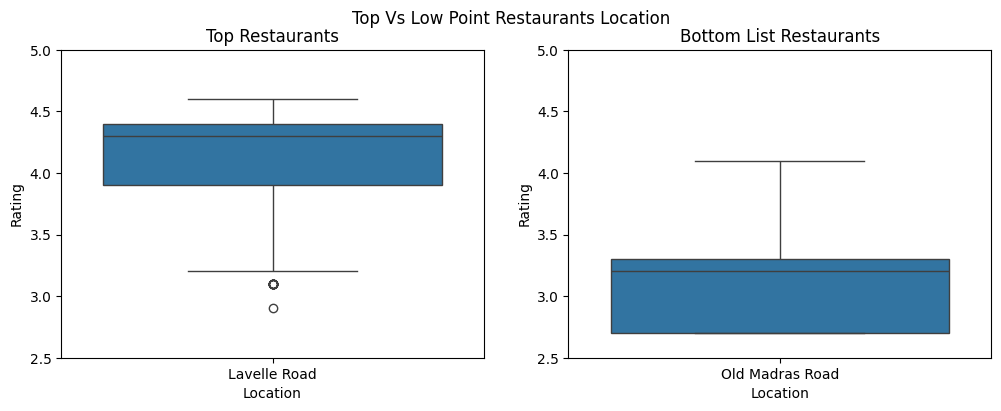

In [16]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(x=df['location'][df['location']==top_res],
            y=df['rating'][df['location']==top_res],
            data=df, ax=ax[0])

sns.boxplot(x=df['location'][df['location']==bottom_res],
            y=df['rating'][df['location']==bottom_res],
            data=df, ax=ax[1])

ax[0].set(ylim=(2.5,5), xlabel='Location', ylabel='Rating', title="Top Restaurants")
ax[1].set(ylim=(2.5,5), xlabel='Location', ylabel='Rating', title="Bottom List Restaurants")

plt.suptitle("Top Vs Low Point Restaurants Location")
plt.show()

## Restaurant

* Types and it's relation with rating

### Types

In [17]:
rest_typ_g = df[['rest_type','rating']].groupby('rest_type')
rest_typ = pd.DataFrame(rest_typ_g['rest_type'].value_counts())
rest_typ = rest_typ.sort_values('count', ascending=False)

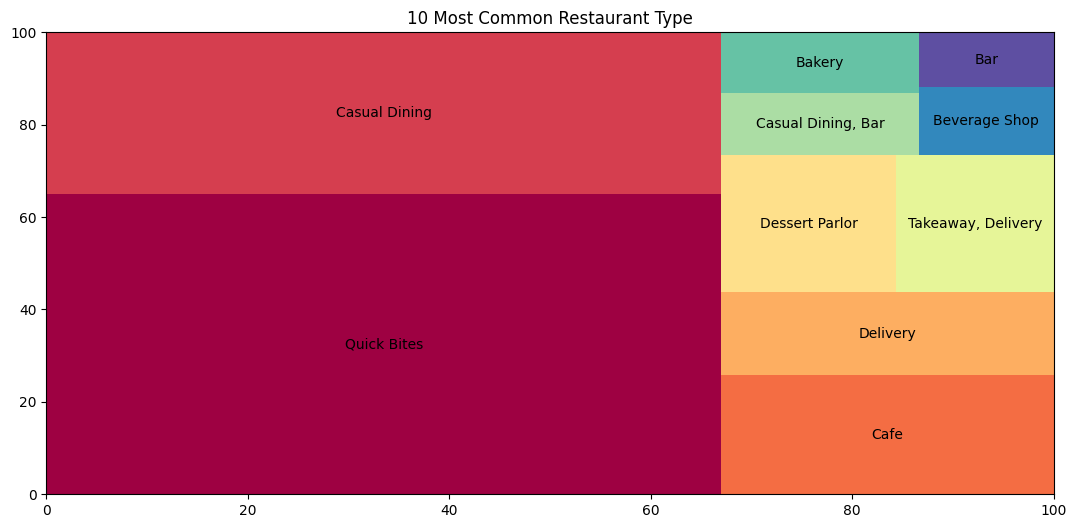

In [18]:
plt.figure(figsize=(13,6))
squarify.plot(sizes=rest_typ['count'][:10],label=rest_typ.index[:10],
              color=['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2'])
plt.title('10 Most Common Restaurant Type')
plt.show()

### Impact in Rating

In [19]:
def top_tupe_condition(col:str,end:int,data_group):
    if data_group.count()['count']<end:
        end = data_group.count()['count']
    condition = (df[col]==data_group.index[0])
    for coun in range(1,end):
        condition = condition | (df[col]==data_group.index[coun])
    return condition

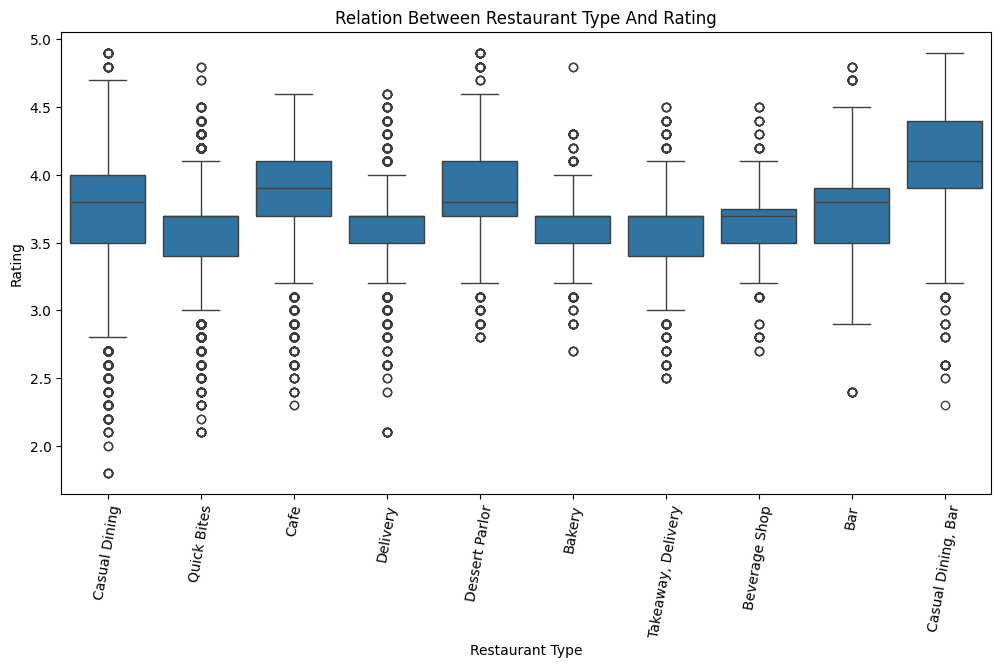

In [20]:
plt.figure(figsize=(12,6))
condition = top_tupe_condition(col='rest_type',end=10,data_group=rest_typ)
sns.boxplot(x=df['rest_type'][condition],
            y=df['rating'],
            data=df[condition])
plt.title("Relation Between Restaurant Type And Rating")
plt.xlabel("Restaurant Type")
plt.xticks(rotation=80)
plt.ylabel("Rating")
plt.show()

## Services

* Types and it's relation with Ratings

### Types

In [21]:
services_type_g = df[['type','rating']].groupby('type')
services_type = pd.DataFrame(services_type_g['type'].value_counts())
services_type = services_type.sort_values('count', ascending=False)

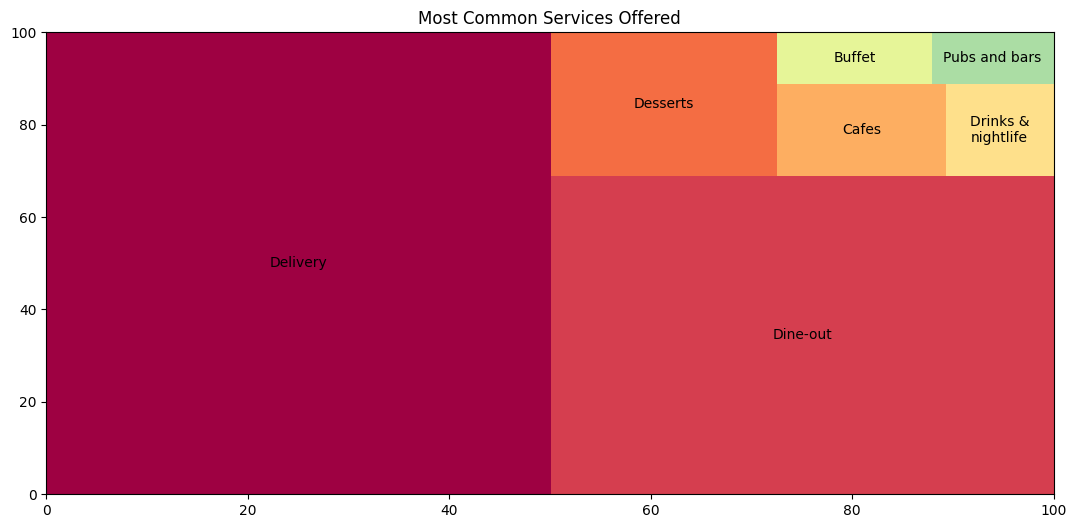

In [22]:
plt.figure(figsize=(13,6))
services_type.index = services_type.index.str.replace("& ","&\n")
squarify.plot(sizes=services_type['count'], label=services_type.index,
             color=['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4'])
plt.title("Most Common Services Offered")
plt.show()

### Impact In Rating

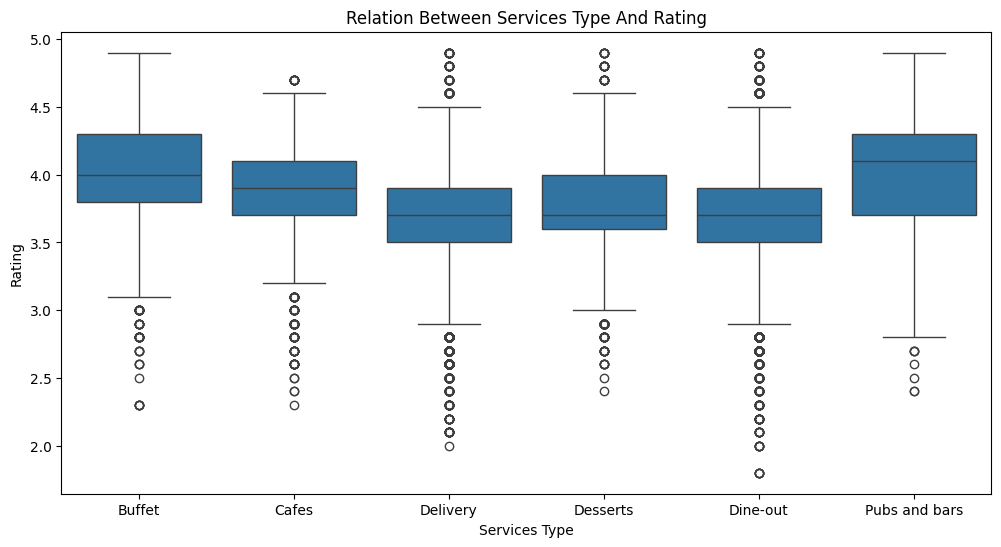

In [23]:
plt.figure(figsize=(12,6))
condition = top_tupe_condition(col='type',end=10, data_group=services_type)
sns.boxplot(x=df['type'][condition],
            y=df['rating'],
            data=df[condition])
plt.title("Relation Between Services Type And Rating")
plt.xlabel("Services Type")
plt.ylabel("Rating")
plt.show()

In [24]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rating',
       'rating_count', 'phone', 'location', 'rest_type', 'specialty',
       'cuisines', 'approx_cost', 'reviews', 'menu', 'type', 'city'],
      dtype='object')